In [1]:
# Notebook to interact with OT2 pipetting robot

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error as MSE
import sklearn

import os
import warnings
import random
import time

In [4]:
def min_max(spectra):
    scaler = sklearn.preprocessing.MinMaxScaler()
    return scaler.fit_transform(spectra.reshape(-1,1)).reshape(1,-1)[0]


def spectra_from_conc(action, RED, GREEN, BLUE):
    """Transforms actions and input into output."""
    fract = normalize_to_fraction(action)
    spec = min_max(RED*fract[0] + GREEN*fract[1] + BLUE*fract[2])
    return spec

def normalize_to_fraction(action):
    """Returns the fraction of total volume given the concentrations (action)."""
    total = np.sum(action)
    return action / total

class Environment(object):
    def __init__(self, target, RED, GREEN, BLUE):
        # in future this will be basis spectra
        self.target = target
        self.RED = RED
        self.GREEN = GREEN
        self.BLUE = BLUE
        self.metric = []
   
    def get_cos_sim(self, target, y):
        return np.average(cosine_similarity(target.reshape(1, -1), Y=y.reshape(1, -1)).squeeze())    
    
    def sample(self, action):
        # put functins in utils python file
        result = spectra_from_conc(action, self.RED, self.GREEN, self.BLUE)
        sim = self.get_cos_sim(self.target, result)
        mse = MSE(self.target, result)
        self.metric.append(sim)
        #return -mse
        return sim

In [5]:
sample_spectra = pd.read_excel('../../data/Sample_spectra.xlsx')
sample_spectra = np.asarray(sample_spectra)
web_spectra = pd.read_csv('../../data/web_spectra.csv').to_numpy()
wavelength = sample_spectra[:,0]
# spectra of base dyes
RED = sample_spectra[:,1]
GREEN = sample_spectra[:,2]
BLUE = sample_spectra[:,3]
SKY_BLUE = web_spectra[:,1]
ERYTHROSINE = web_spectra[:,2]
TATRIZINE = web_spectra[:,3]
BERRY = web_spectra[:,4]
SUNFLOWER = web_spectra[:,5]
FAST_GREEN = web_spectra[:,6]
ALLURA_RED = web_spectra[:,7]
SUNSET_YELLOW = web_spectra[:,8]
BRILLIANT_BLUE = web_spectra[:,9]
INDIGO_CARMINE = web_spectra[:,10]

dyes = sample_spectra[:,1:4]
dyes = np.hstack((dyes, web_spectra[:,1:]))[:,3:10]
PURPLE = []
for i in range(len(BLUE)):
    if i>30:
        PURPLE.append(1.5)
    else:
        PURPLE.append(0)

PURPLE=np.array(PURPLE)

target_conc = np.random.dirichlet((1, 1, 1), 1)[0]
target_spectra = spectra_from_conc(target_conc, RED, GREEN, BLUE)
#print(target_spectra)
#target_spectra = np.array([i*(random.random()/2 + .5) for i in target_spectra])

target_spectra = []
for i in range(len(BLUE)):
    if i<5 or i>35:
        target_spectra.append(0)
    elif i<15 or i>25:
        target_spectra.append(1)
    else:
        target_spectra.append(1.8)
target_spectra = np.array(target_spectra)

target = target_spectra
    
env = Environment(target_spectra, RED, GREEN, BLUE)

batch_size = 15
epochs = 10

FileNotFoundError: [Errno 2] No such file or directory: '../../data/web_spectra.csv'

In [6]:
#constraints
min_conc = 0.05
max_conc = 1

# parameter space
N = 20  # grid size

# construct param space
coeffs = np.linspace(min_conc, max_conc, N)
param_space = np.meshgrid(coeffs, coeffs, coeffs, coeffs, coeffs)

# Initialize agent

In [8]:
batch_size = 15
agent2 = BatchGPUCBv2(batch_size, param_space, env, beta=3)
agent3 = BatchGPUCBv3(batch_size, param_space, env, beta=3)

(8000, 3)
(8000,)
(8000,)
(8000, 3)
(8000,)
(8000,)


# Learn

In [9]:
# training loop
time3 = 0
time2 = 0

for i in range(epochs):
    start = time.time()
    agent3.learn()
    time3 += (time.time() - start)
    start = time.time()
    agent2.learn()
    time2 += (time.time() - start)

len 1
----
grid [ 399  379  799  398  359  779 1199  378  339  759  798 1179  358  319
  397]
len 2
----
[]
239
[239]
7604
[239, 7604]
0
[239, 7604, 0]
3079
[239, 7604, 0, 3079]
3607
[239, 7604, 0, 3079, 3607]
7999
[239, 7604, 0, 3079, 3607, 7999]
399
[239, 7604, 0, 3079, 3607, 7999, 399]
7880
[239, 7604, 0, 3079, 3607, 7999, 399, 7880]
4535
[239, 7604, 0, 3079, 3607, 7999, 399, 7880, 4535]
3779
[239, 7604, 0, 3079, 3607, 7999, 399, 7880, 4535, 3779]
7769
[239, 7604, 0, 3079, 3607, 7999, 399, 7880, 4535, 3779, 7769]
2577
[239, 7604, 0, 3079, 3607, 7999, 399, 7880, 4535, 3779, 7769, 2577]
3818
[239, 7604, 0, 3079, 3607, 7999, 399, 7880, 4535, 3779, 7769, 2577, 3818]
3019
[239, 7604, 0, 3079, 3607, 7999, 399, 7880, 4535, 3779, 7769, 2577, 3818, 3019]
3819
grid [7600 7200 7620 6800 7601 7220 7640 7201 6400 7621 6820 6801 7240 6000
 7602]


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

len 3
----
[]
59
[59]
93
[59, 93]
7799
[59, 93, 7799]
139
[59, 93, 7799, 139]
6
[59, 93, 7799, 139, 6]
2953
[59, 93, 7799, 139, 6, 2953]
1359
[59, 93, 7799, 139, 6, 2953, 1359]
1734
[59, 93, 7799, 139, 6, 2953, 1359, 1734]
2579
[59, 93, 7799, 139, 6, 2953, 1359, 1734, 2579]
2555
[59, 93, 7799, 139, 6, 2953, 1359, 1734, 2579, 2555]
2156


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

[59, 93, 7799, 139, 6, 2953, 1359, 1734, 2579, 2555, 2156]
1756
[59, 93, 7799, 139, 6, 2953, 1359, 1734, 2579, 2555, 2156, 1756]
2157
[59, 93, 7799, 139, 6, 2953, 1359, 1734, 2579, 2555, 2156, 1756, 2157]
2578
[59, 93, 7799, 139, 6, 2953, 1359, 1734, 2579, 2555, 2156, 1756, 2157, 2578]
2578
excluded
grid [7619 7639 7659 7219 7618 7679 7239 7638 7699 7999 7979 7259 7719 7658
 7959]
len 4
----
[]
1313
[1313]
2113
[1313, 2113]
2535


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

[1313, 2113, 2535]
1292
[1313, 2113, 2535, 1292]
1735
[1313, 2113, 2535, 1292, 1735]
2536
[1313, 2113, 2535, 1292, 1735, 2536]
1778
[1313, 2113, 2535, 1292, 1735, 2536, 1778]
2134
[1313, 2113, 2535, 1292, 1735, 2536, 1778, 2134]
2157
[1313, 2113, 2535, 1292, 1735, 2536, 1778, 2134, 2157]
2113
excluded
[1313, 2113, 2535, 1292, 1735, 2536, 1778, 2134, 2157, 1757]
2115
[1313, 2113, 2535, 1292, 1735, 2536, 1778, 2134, 2157, 1757, 2115]
2558
[1313, 2113, 2535, 1292, 1735, 2536, 1778, 2134, 2157, 1757, 2115, 2558]
1693
[1313, 2113, 2535, 1292, 1735, 2536, 1778, 2134, 2157, 1757, 2115, 2558, 1693]
2137
[1313, 2113, 2535, 1292, 1735, 2536, 1778, 2134, 2157, 1757, 2115, 2558, 1693, 2137]
2114


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

grid [7973 7953 7952 7972 7992 7993 7933 7974 7954 7932 7934 7994 7971 7951
 7913]
len 5
----
[]
1335
[1335]
1266
[1335, 1266]
2577
[1335, 1266, 2577]
2156
[1335, 1266, 2577, 2156]
1691
[1335, 1266, 2577, 2156, 1691]
1714
[1335, 1266, 2577, 2156, 1691, 1714]
3799
[1335, 1266, 2577, 2156, 1691, 1714, 3799]
2579


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

[1335, 1266, 2577, 2156, 1691, 1714, 3799, 2579]
2999
[1335, 1266, 2577, 2156, 1691, 1714, 3799, 2579, 2999]
1290
[1335, 1266, 2577, 2156, 1691, 1714, 3799, 2579, 2999, 1290]
2576
[1335, 1266, 2577, 2156, 1691, 1714, 3799, 2579, 2999, 1290, 2576]
4219
[1335, 1266, 2577, 2156, 1691, 1714, 3799, 2579, 2999, 1290, 2576, 4219]
2179
[1335, 1266, 2577, 2156, 1691, 1714, 3799, 2579, 2999, 1290, 2576, 4219, 2179]
844
[1335, 1266, 2577, 2156, 1691, 1714, 3799, 2579, 2999, 1290, 2576, 4219, 2179, 844]
2576
excluded


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

grid [2956 3355 3777 4639 5839 3374 3396 2975 2157 3375 2557 3776 2577 3334
 2135]
len 6
----
[]
2979
[2979]
2156
[2979, 2156]
1291
[2979, 2156, 1291]
2155
[2979, 2156, 1291, 2155]
3376
[2979, 2156, 1291, 2155, 3376]
2155
excluded
[2979, 2156, 1291, 2155, 3376, 2577]
2956


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

[2979, 2156, 1291, 2155, 3376, 2577, 2956]
1777
[2979, 2156, 1291, 2155, 3376, 2577, 2956, 1777]
2557
[2979, 2156, 1291, 2155, 3376, 2577, 2956, 1777, 2557]
1355
[2979, 2156, 1291, 2155, 3376, 2577, 2956, 1777, 2557, 1355]
1756
[2979, 2156, 1291, 2155, 3376, 2577, 2956, 1777, 2557, 1355, 1756]
2999
[2979, 2156, 1291, 2155, 3376, 2577, 2956, 1777, 2557, 1355, 1756, 2999]
3376
excluded
[2979, 2156, 1291, 2155, 3376, 2577, 2956, 1777, 2557, 1355, 1756, 2999, 2157]
3019
[2979, 2156, 1291, 2155, 3376, 2577, 2956, 1777, 2557, 1355, 1756, 2999, 2157, 3019]
2958


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

grid [2956 3355 4578 3377 4176 3796 4618 4198 3759 2556 3356 4597 2576 3774
 4619]
len 7
----
[]
1356
[1356]
1755
[1356, 1755]
2555
[1356, 1755, 2555]
2178
[1356, 1755, 2555, 2178]
2578
[1356, 1755, 2555, 2178, 2578]
2599


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

[1356, 1755, 2555, 2178, 2578, 2599]
1710
[1356, 1755, 2555, 2178, 2578, 2599, 1710]
2978
[1356, 1755, 2555, 2178, 2578, 2599, 1710, 2978]
1338
[1356, 1755, 2555, 2178, 2578, 2599, 1710, 2978, 1338]
2155
[1356, 1755, 2555, 2178, 2578, 2599, 1710, 2978, 1338, 2155]
1359
[1356, 1755, 2555, 2178, 2578, 2599, 1710, 2978, 1338, 2155, 1359]
2177
[1356, 1755, 2555, 2178, 2578, 2599, 1710, 2978, 1338, 2155, 1359, 2177]
2534
[1356, 1755, 2555, 2178, 2578, 2599, 1710, 2978, 1338, 2155, 1359, 2177, 2534]
3378


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

[1356, 1755, 2555, 2178, 2578, 2599, 1710, 2978, 1338, 2155, 1359, 2177, 2534, 3378]
2576
grid [3378 3377 3379 3777 1735 2959 3354 2155 2977 2135 2956 2554 2535 2979
 2955]
len 8
----
[]
2599
[2599]
2579
[2599, 2579]
2176


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

[2599, 2579, 2176]
1357
[2599, 2579, 2176, 1357]
2112
[2599, 2579, 2176, 1357, 2112]
1734
[2599, 2579, 2176, 1357, 2112, 1734]
2998
[2599, 2579, 2176, 1357, 2112, 1734, 2998]
2156
[2599, 2579, 2176, 1357, 2112, 1734, 2998, 2156]
2133
[2599, 2579, 2176, 1357, 2112, 1734, 2998, 2156, 2133]
2554
[2599, 2579, 2176, 1357, 2112, 1734, 2998, 2156, 2133, 2554]
1779


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: User

[2599, 2579, 2176, 1357, 2112, 1734, 2998, 2156, 2133, 2554, 1779]
1757
[2599, 2579, 2176, 1357, 2112, 1734, 2998, 2156, 2133, 2554, 1779, 1757]
2976
[2599, 2579, 2176, 1357, 2112, 1734, 2998, 2156, 2133, 2554, 1779, 1757, 2976]
1758
[2599, 2579, 2176, 1357, 2112, 1734, 2998, 2156, 2133, 2554, 1779, 1757, 2976, 1758]
1755


/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "
/Users/Will/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/_gpr.py:375: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [10]:
new_data = new_agent.X
data = agent.X

[Text(0, 0.5, 'absorption'),
 Text(0, 0.5, 'absorption'),
 Text(0, 0.5, 'absorption'),
 Text(0, 0.5, 'absorption')]

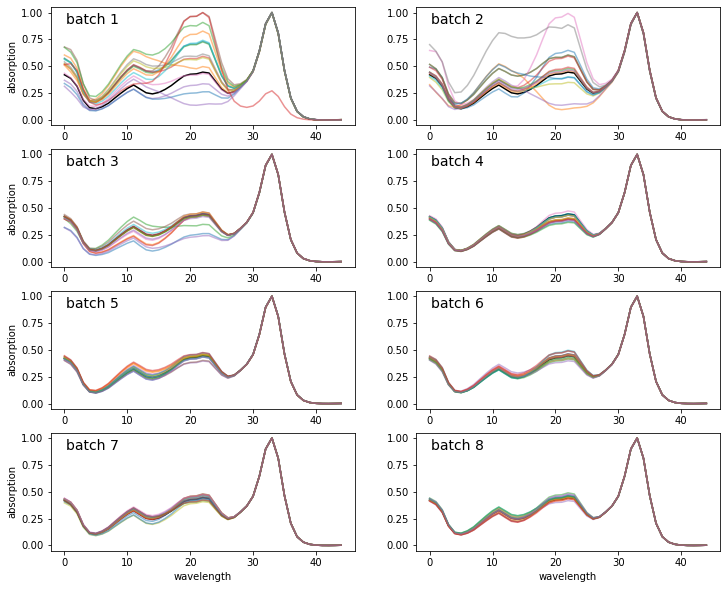

In [11]:
fig, axs = plt.subplots(nrows=epochs//2, ncols=2, figsize=(12, 10))
axs=axs.flatten()
for i in range(epochs):
    #plt.figure()
    axs[i].plot(min_max(target_spectra), color='black', label='target')
    textstr=f"batch {i+1}"
    axs[i].text(0.05, 0.95, textstr, transform=axs[i].transAxes, fontsize=14,
        verticalalignment='top')
    for j in range(batch_size):
        spec = spectra_from_conc(new_data[i*batch_size + j], RED, GREEN, BLUE)
        axs[i].plot(spec, alpha=.5)
    
plt.setp(axs[[-2,-1]], xlabel='wavelength')
plt.setp(axs[::2], ylabel='absorption')

[Text(0, 0.5, 'absorption'),
 Text(0, 0.5, 'absorption'),
 Text(0, 0.5, 'absorption'),
 Text(0, 0.5, 'absorption')]

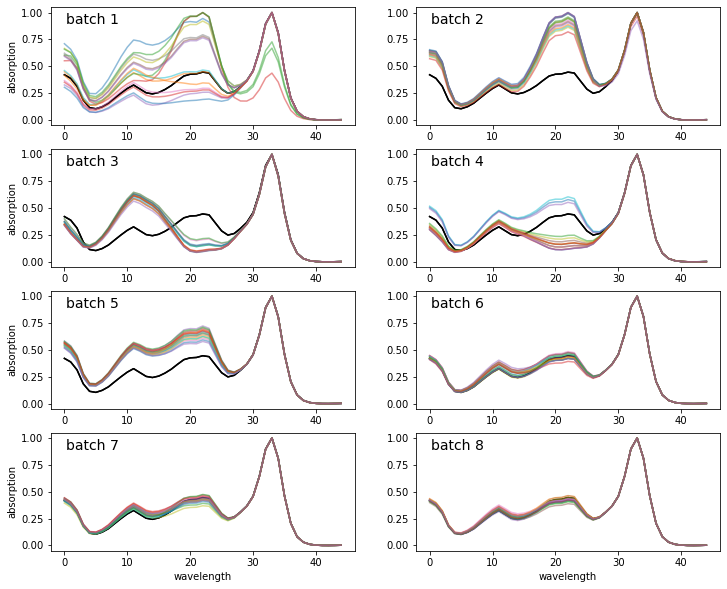

In [12]:
fig, axs = plt.subplots(nrows=epochs//2, ncols=2, figsize=(12, 10))
axs=axs.flatten()
    
i = 0
for epoch in data:
    axs[i].plot(min_max(target_spectra), color='black', label='target')
    axs[i].plot(min_max(target_spectra), color='black', label='target')
    textstr=f"batch {i+1}"
    axs[i].text(0.05, 0.95, textstr, transform=axs[i].transAxes, fontsize=14,
        verticalalignment='top')
    for sol in epoch:
        spec = spectra_from_conc(sol, RED, GREEN, BLUE)
        axs[i].plot(spec, alpha=.5)
    i+=1  
plt.setp(axs[[-2,-1]], xlabel='wavelength')
plt.setp(axs[::2], ylabel='absorption')